In [ ]:
from google.colab import drive
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive/colab/
!cp /content/drive/My\ Drive/colab/kaggle_setup.py /content/

kaggle.json  kaggle_setup.py


In [ ]:
%run kaggle_setup.py

MessageError: CustomError: Timed out waiting for output iframe load.

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques


  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 67.7MB/s]


In [ ]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!ls

data_description.txt				 kaggle_setup.py	test.csv
drive						 sample_data		train.csv
house-prices-advanced-regression-techniques.zip  sample_submission.csv


In [ ]:
# Загрузка данных
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
# Пример предобработки данных
def preprocess_data(df, train_cols=None): # Add train_cols argument
    # Заполнение пропущенных значений
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].fillna("None")
        else:
            df[col] = df[col].fillna(0)

    # Преобразование категориальных признаков в числовые
    df = pd.get_dummies(df)

    if train_cols is not None: # Align columns with training data
        for col in train_cols:
            if col not in df.columns:
                df[col] = 0
        df = df[train_cols]

    return df

In [ ]:
X = preprocess_data(train.drop(columns=['SalePrice']))
y = train['SalePrice']
X_test = preprocess_data(test, train_cols=X.columns) # Pass X.columns to align columns

In [ ]:
# Выравнивание данных (убедитесь, что колонки в тестовом наборе данных совпадают с обучающим)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


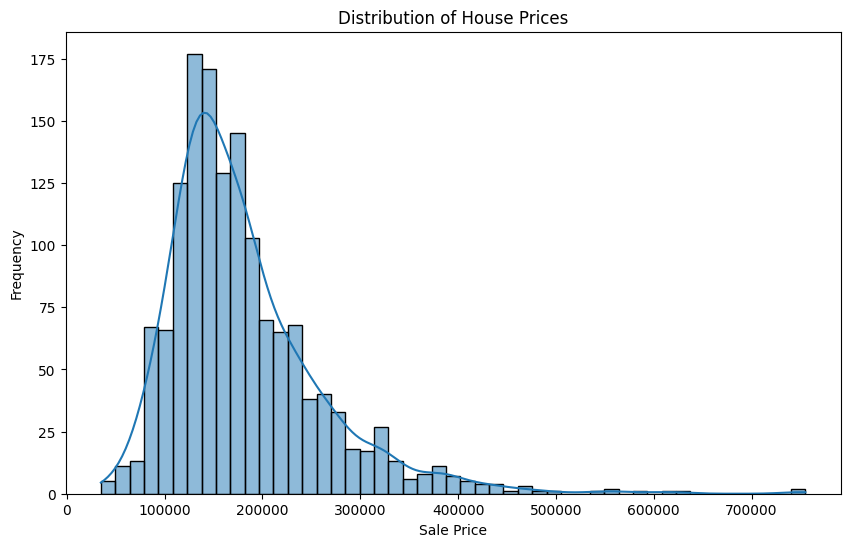

In [ ]:
# Построение графика распределения цен
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=4)
model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_val, y_val)])

In [ ]:
# Предсказание на валидационной выборке
y_val_pred = model.predict(X_val)

# Вычисление RMSE и R^2
rmse = mean_squared_error(y_val, y_val_pred, squared=False)
r2 = r2_score(y_val, y_val_pred)

# Вывод RMSE и R^2
print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

# Предсказание на тестовой выборке
y_test_pred = model.predict(X_test)

RMSE: 25723.53987613423
R^2: 0.9137324168639592
